### 7) 범주형 독립변수

In [ ]:
#1920~1939년 노팅엄 지역 월 평균 기온 데이터
import pandas as pd
df = pd.read_csv('c:/data/degree/data.csv')
df

In [ ]:
%matplotlib inline
#boxplot(y,x)
df.boxplot("value", "month")

In [ ]:
#카테고리형 변수인 월이 연속숫자형으로 인식되지 않도록 C() 함수 사용

In [ ]:
import statsmodels.api as sm
# +0을 붙이면 1월~12월이 평균기온으로 처리됨
# coef는 월의 평균기온
model = sm.OLS.from_formula("value ~ C(month)+0", df)
result = model.fit()
result.summary()

In [ ]:
# +0이 없으면 첫번째 변수인 1월은 제외하고 1월을 기준으로 각 월의 평균 기온이
# 1월보다 얼마나 더 높은지 낮은지를 나타내는 값이 회귀모형의 계수가 된다.
model = sm.OLS.from_formula("value ~ C(month)", df)
result = model.fit()
result.summary()

### 8) 부분회귀 플롯
* 다중회귀한 상태에서 보고싶은 독립변수와 종속변수와의 회귀플롯그리기

In [ ]:
# down grade for load_boston
!C:\Python38\Scripts\pip install scikit-learn==1.0.2

In [ ]:
# 새로운 독립변수를 추가하여 다시 회귀분석을 하면 기존 가중치 벡터의 값은 변경된다.
# 부분회귀플롯:독립변수가 여러개일 때 특정한 하나의 독립변수의 영향력을 시각화하는 방법

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df

c:\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [2]:
import statsmodels.api as sm
model = sm.OLS(dfy, dfX) # ols 최소 자승법
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Fri, 18 Aug 2023   Prob (F-statistic):                        0.00
Time:                        09:52:29   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='AGE', ylabel='MEDV'>

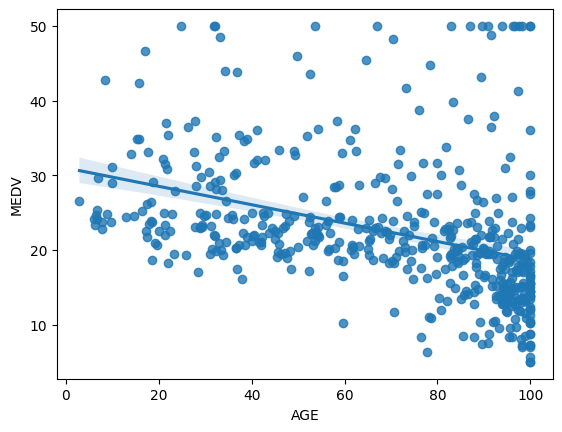

In [3]:
%matplotlib inline
import seaborn as sns
#age와 medv는 음의 상관관계가 있는 것처럼 보인다.
#이 부분플롯은 순수하게 age와 medv의 상관관계를 표현한 것이 아님.
sns.regplot(x="AGE", y="MEDV", data=df)

In [4]:
# A.difference(B) A-B 차집합, 빼고싶은거 빼고 (유의성 검증에서 안좋은거 빼기)
others = list(set(df.columns).difference(set(["MEDV", "AGE"])))
others

['PTRATIO',
 'LSTAT',
 'RM',
 'ZN',
 'RAD',
 'NOX',
 'DIS',
 'CRIM',
 'INDUS',
 'B',
 'CHAS',
 'TAX']

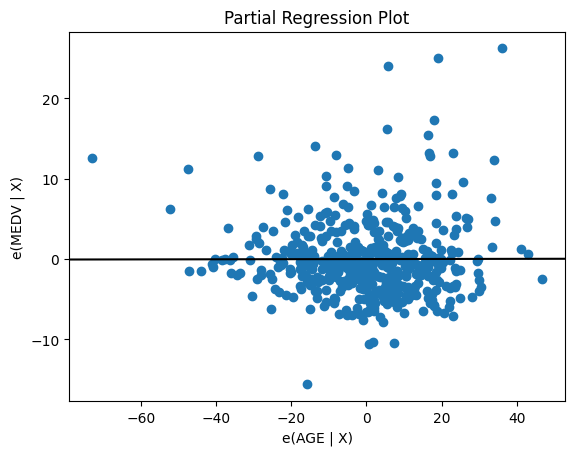

In [5]:
from statsmodels.graphics.regressionplots import plot_partregress
import matplotlib.pyplot as plt
# others : AGE를 제외한 나머지 독립변수들
# obs_labels : 데이터 라벨링 여부
plot_partregress("MEDV", "AGE", others, data=df, obs_labels=False)
plt.show()
#부분회귀 플롯을 볼 때 age와 medv는 상관관계가 없다.
#가로축의 값은 독립변수 자체의 값이 아닌
# 어떤 독립변수에서 다른 독립변수의 영향을 제거한 값

[]

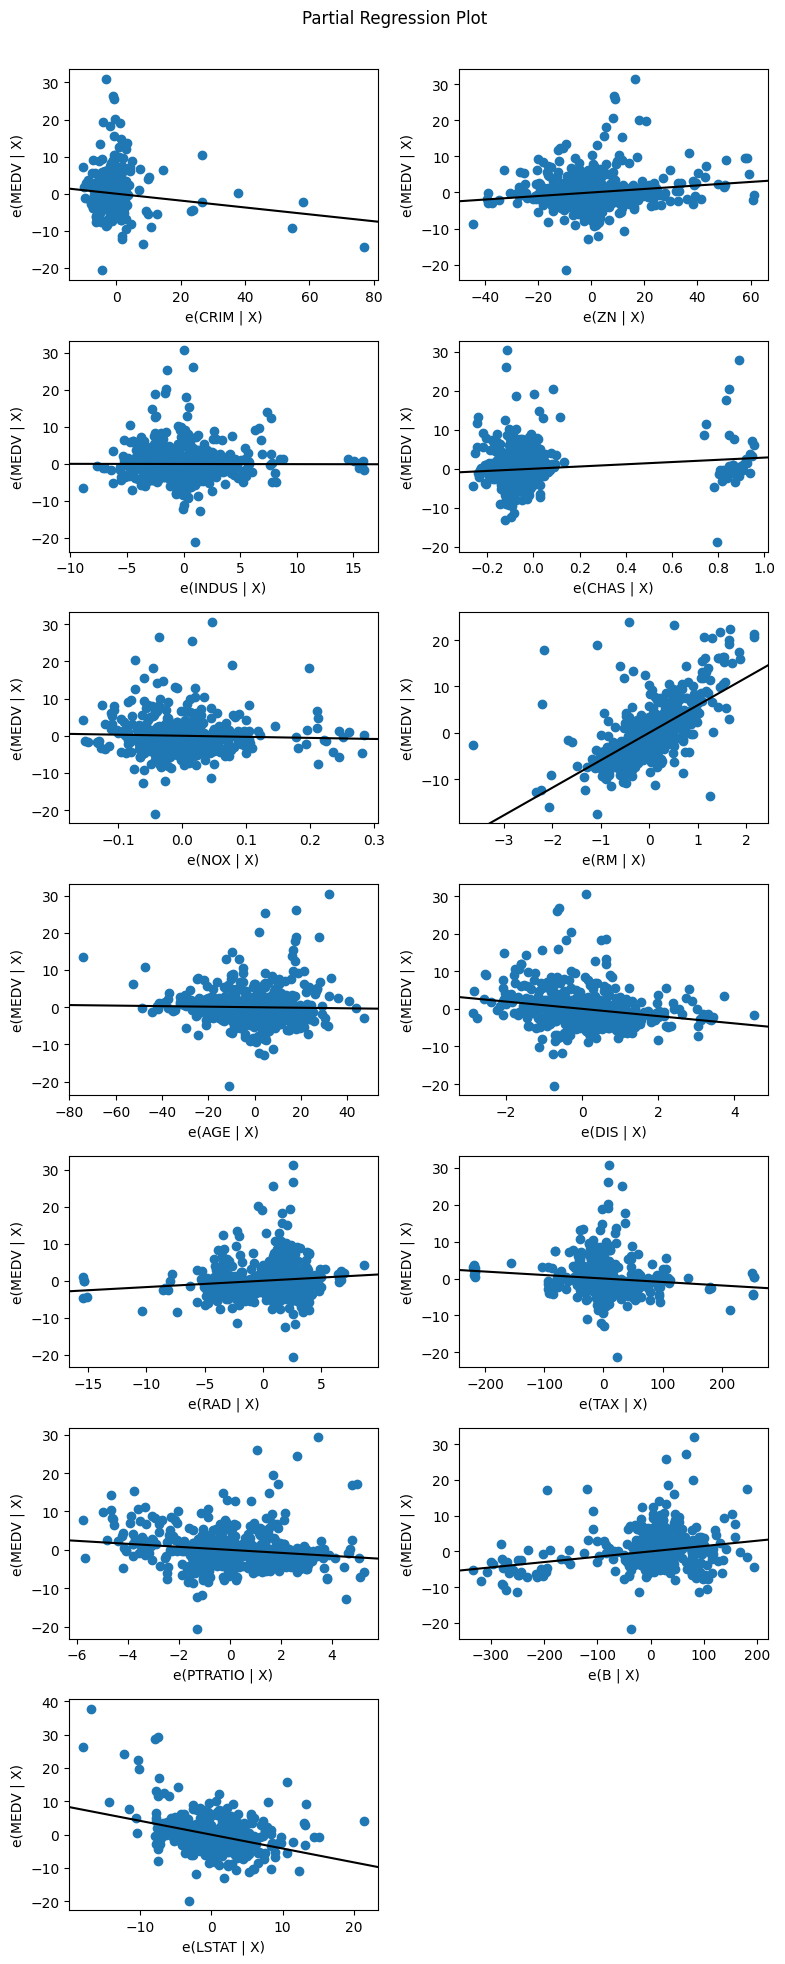

In [6]:
#전체 데이터에 대해 한번에 부분회귀 플롯을 그리는 함수
from statsmodels.graphics.regressionplots import plot_partregress_grid
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 20))
# result: 학습 완료된 모형
plot_partregress_grid(result, fig=fig)
plt.plot()

### 9) 보험료 예측
* 범주형 변수 원핫 인코딩

In [7]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data2 = pd.read_csv('../DATA/insurance2.csv')
data2.head()

,age,sex,bmi,children,smoker,southwest,southeast,northeast,northwest,charges
0,19,0,27.900,0,1,1,0,0,0,16884.92400
1,18,1,33.770,1,0,0,1,0,0,1725.55230
2,28,1,33.000,3,0,0,1,0,0,4449.46200
3,33,1,22.705,0,0,0,0,0,1,21984.47061
4,32,1,28.880,0,0,0,0,0,1,3866.85520


In [9]:
data2.corr()['charges'].sort_values()

southwest   -0.043210
northwest   -0.039905
northeast    0.006349
sex          0.057292
children     0.067998
southeast    0.073982
bmi          0.198341
age          0.299008
smoker       0.787251
charges      1.000000
Name: charges, dtype: float64

In [10]:
X=data2[data2.columns[:-1]]
y=data2['charges']
import statsmodels.api as sm
model=sm.OLS(y,X)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 18 Aug 2023   Prob (F-statistic):               0.00
Time:                        10:04:37   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          256.8564     11.899     21.587      0.000     233.514     280.199
sex         -131.3144    332.945     -0.394      0.693    -784.470     521.842
bmi          339.1935     28.599     11.860      0.000     283.088     395.298
children     475.5005    137.804      3.451      0.001     205.163     745.838
smoker      2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
southwest   -1.29e+04   1020.964    -12.634      0.000   -1.49e+04   -1.09e+04
southeast  -1.297e+04   1079.158    -12.022      0.000   -1.51e+04   -1.09e+04
northeast  -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
northwest  -1.229e+04    988.196    -12.438      0.000   -1.42e+04   -1.04e+04
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         605.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
X.columns
X=X[['age', 'bmi', 'children', 'smoker', 'southwest',
'southeast', 'northeast', 'northwest']]
model=sm.OLS(y,X)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Fri, 18 Aug 2023   Prob (F-statistic):               0.00
Time:                        10:04:45   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          256.9736     11.891     21.610      0.000     233.646     280.301
bmi          338.6646     28.559     11.858      0.000     282.639     394.690
children     474.5665    137.740      3.445      0.001     204.355     744.778
smoker      2.384e+04    411.856     57.875      0.000     2.3e+04    2.46e+04
southwest  -1.295e+04   1012.403    -12.791      0.000   -1.49e+04    -1.1e+04
southeast  -1.302e+04   1071.021    -12.161      0.000   -1.51e+04   -1.09e+04
northeast  -1.199e+04    978.762    -12.250      0.000   -1.39e+04   -1.01e+04
northwest  -1.234e+04    979.405    -12.602      0.000   -1.43e+04   -1.04e+04
==============================================================================
Omnibus:                      300.735   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.516
Skew:                           1.212   Prob(JB):                    3.48e-157
Kurtosis:                       5.654   Cond. No.                         600.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 17) 모형의 진단과 수정

In [33]:
#기계학습모형의 성능을 진단하고 성능을 개선하는 과정
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston = pd.concat([dfX, dfy], axis=1)
df_boston


c:\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


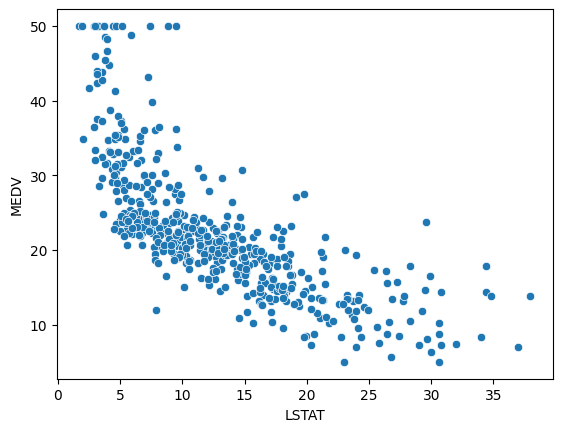

In [34]:
#두 변수는 비선형 관계임(인구중 하위계층 비율과 주택가격)
sns.scatterplot(x="LSTAT", y="MEDV", data=df_boston)
plt.show()

In [13]:
import statsmodels.api as sm
model1 = sm.OLS.from_formula("MEDV ~ LSTAT", data=df_boston)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           5.08e-88
Time:                        10:20:02   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

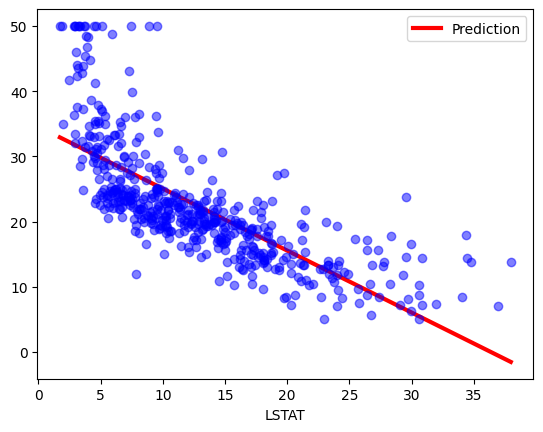

In [14]:
#예측값과 실제값 비교
y_hat1 = result1.predict(df_boston)
df1 = pd.concat([y_hat1, df_boston.LSTAT], axis=1).sort_values("LSTAT")
df1.columns = ["Prediction", "LSTAT"]
df1.plot(x="LSTAT", style="r-", lw=3)
plt.plot(df_boston.LSTAT, df_boston.MEDV, "bo", alpha=0.5)
plt.show()
#예측력이 약한 모형

In [15]:
#LSTAT을 제곱한 비선형 독립변수를 추가한 모형
model2 = sm.OLS.from_formula("MEDV ~ LSTAT + I(LSTAT**2)",data=df_boston)
result2 = model2.fit()
print(result2.summary())
#성능이 향상됨 54.4% => 64.1%

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 18 Aug 2023   Prob (F-statistic):          1.56e-112
Time:                        10:20:07   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

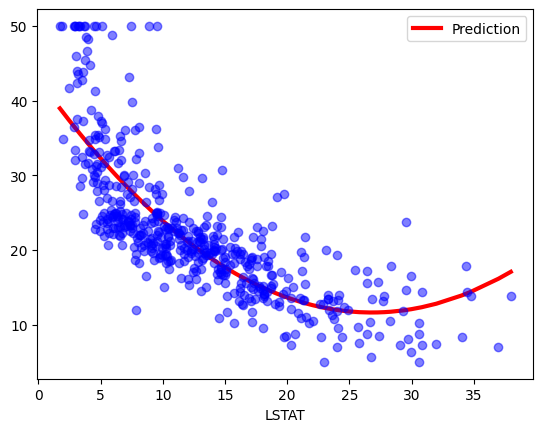

In [16]:
y_hat2 = result2.predict(df_boston)
df2 = pd.concat([y_hat2, df_boston.LSTAT], axis=1).sort_values("LSTAT")
df2.columns = ["Prediction", "LSTAT"]
df2.plot(x="LSTAT", style="r-", lw=3)
plt.plot(df_boston.LSTAT, df_boston.MEDV, "bo", alpha=0.5)
plt.show()
#선형모형보다 좀더 적합한 모형

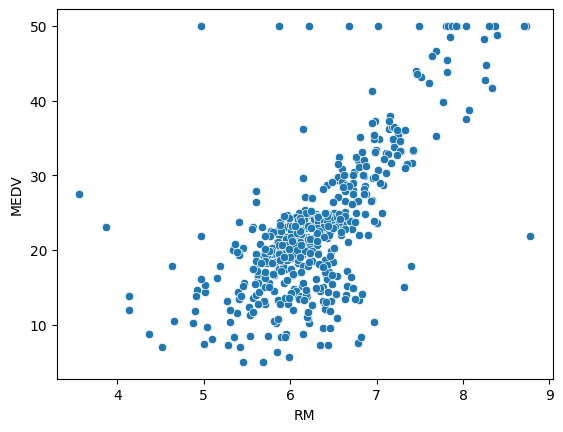

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [17]:
#범주형 변수의 예
# 방의 개수가 아주 적거나 아주 많으면 선형모형이 잘 맞지 않는다.
sns.scatterplot(x="RM", y="MEDV", data=df_boston)
plt.show()
df_boston['RM']

In [18]:
model3 = sm.OLS.from_formula("MEDV ~ RM", data=df_boston)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           2.49e-74
Time:                        10:30:38   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='CAT_RM', ylabel='MEDV'>

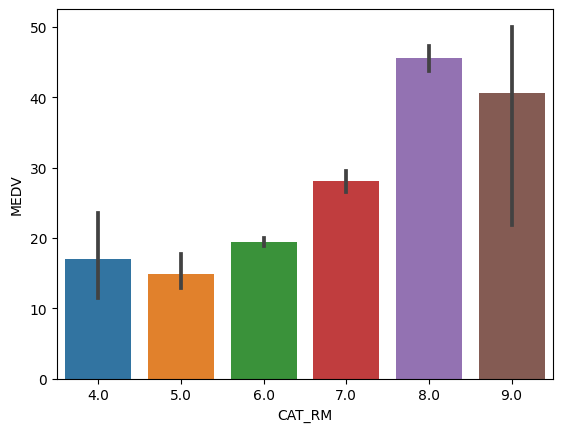

In [19]:
import numpy as np
df_boston["CAT_RM"] = np.round(df_boston.RM)
sns.barplot(x="CAT_RM", y="MEDV", data=df_boston)

In [20]:
#실수형을 정수형으로 바꾸고 더미변수를 사용한 모형
model4 = sm.OLS.from_formula("MEDV ~ C(np.round(RM))+0",data=df_boston)
result4 = model4.fit()
result4.summary()
# 성능이 개선됨 48.4 => 53.7%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     115.8
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           3.57e-81
Time:                        10:30:43   Log-Likelihood:                -1645.6
No. Observations:                 506   AIC:                             3303.
Df Residuals:                     500   BIC:                             3329.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
C(np.round(RM))[4.0]    17.0200      2.814      6.049      0.000      11.492      22.548
C(np.round(RM))[5.0]    14.9459      1.034     14.450      0.000      12.914      16.978
C(np.round(RM))[6.0]    19.3660      0.356     54.369      0.000      18.666      20.066
C(np.round(RM))[7.0]    28.0472      0.563     49.840      0.000      26.942      29.153
C(np.round(RM))[8.0]    45.5625      1.284     35.477      0.000      43.039      48.086
C(np.round(RM))[9.0]    40.6333      3.633     11.186      0.000      33.496      47.770
==============================================================================
Omnibus:                       81.744   Durbin-Watson:                   0.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              467.887
Skew:                           0.542   Prob(JB):                    2.51e-102
Kurtosis:                       7.584   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#독립변수가 시간인 경우 특정 시점에서 경과된 시간값으로 변형해야 함
#일자별 전력수요량
df=pd.read_csv('../DATA/energy.csv')
df.head()

,Unnamed: 0,Demand,Date
0,0,174.896295,2019-01-01
1,1,188.590935,2019-01-02
2,2,188.916891,2019-01-03
3,3,173.814244,2019-01-04
4,4,169.515175,2019-01-05


In [22]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
# toordinal 서기 1년 1월 1일을 기준으로 경과한 날짜
df["Ordinal"] = df.Date.map(dt.datetime.toordinal)
df["Timestamp"] = df.Date.map(dt.datetime.timestamp)
df.head()

,Unnamed: 0,Demand,Date,Ordinal,Timestamp
0,0,174.896295,2019-01-01,737060,1.546268e+09
1,1,188.590935,2019-01-02,737061,1.546355e+09
2,2,188.916891,2019-01-03,737062,1.546441e+09
3,3,173.814244,2019-01-04,737063,1.546528e+09
4,4,169.515175,2019-01-05,737064,1.546614e+09


In [23]:
#일단위 날짜를 기준으로 분석, 날짜는 단위가 크므로 스케일링이 필요함
model5 = sm.OLS.from_formula("Demand ~ scale(Ordinal)",data=df)
result5 = model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Demand   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     11.58
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           0.000739
Time:                        10:31:01   Log-Likelihood:                -1709.7
No. Observations:                 365   AIC:                             3423.
Df Residuals:                     363   BIC:                             3431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        221.2775      1.374    160.997      0.000     218.575     223.980
scale(Ordinal)    -4.6779      1.374     -3.404      0.001      -7.381      -1.975
==============================================================================
Omnibus:                       43.105   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.485
Skew:                           0.614   Prob(JB):                     1.12e-21
Kurtosis:                       5.199   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#시간에서 활용할 수 있는 추가적인 필드들
df["Year"] = df.Date.dt.year
df["Month"] = df.Date.dt.month
df["DayOfYear"] = df.Date.dt.dayofyear #연중 몇일차
df["DayOfMonth"] = df.Date.dt.daysinmonth #일수
df["DayOfWeek"] = df.Date.dt.dayofweek
df["WeekOfYear"] = df.Date.dt.weekofyear #연중 몇주차
df["Weekday"] = df.Date.dt.weekday #요일코드
df["IsMonthStart"] = df.Date.dt.is_month_start
df["IsMonthEnd"] = df.Date.dt.is_month_end
df.tail()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_16452\799855565.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["WeekOfYear"] = df.Date.dt.weekofyear #연중 몇주차


,Unnamed: 0,Demand,Date,Ordinal,Timestamp,Year,Month,DayOfYear,DayOfMonth,DayOfWeek,WeekOfYear,Weekday,IsMonthStart,IsMonthEnd
360,360,173.727990,2019-12-27,737420,1.577372e+09,2019,12,361,31,4,52,4,False,False
361,361,188.512817,2019-12-28,737421,1.577459e+09,2019,12,362,31,5,52,5,False,False
362,362,191.273009,2019-12-29,737422,1.577545e+09,2019,12,363,31,6,52,6,False,False
363,363,186.240144,2019-12-30,737423,1.577632e+09,2019,12,364,31,0,1,0,False,False
364,364,186.370181,2019-12-31,737424,1.577718e+09,2019,12,365,31,1,1,1,False,True


In [25]:
formula = """
Demand ~ scale(Ordinal) + C(Month)+0 + DayOfYear +
C(DayOfMonth)+0 + C(DayOfWeek)+0 + C(Weekday)+0 +
C(IsMonthStart)+0 + C(IsMonthEnd)+0
"""
model6 = sm.OLS.from_formula(formula, data=df)
result6 = model6.fit()
result6.summary()
#3.1%에서 53.7%로 향상됨

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Demand   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     19.98
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           4.74e-46
Time:                        10:31:05   Log-Likelihood:                -1574.8
No. Observations:                 365   AIC:                             3192.
Df Residuals:                     344   BIC:                             3273.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(Month)[1]               -35.4453     20.040     -1.769      0.078     -74.862       3.972
C(Month)[2]                10.1956     10.114      1.008      0.314      -9.698      30.089
C(Month)[3]               -36.6822     12.925     -2.838      0.005     -62.104     -11.260
C(Month)[4]               -30.0630     11.405     -2.636      0.009     -52.495      -7.631
C(Month)[5]               -12.0416      5.926     -2.032      0.043     -23.698      -0.385
C(Month)[6]                10.4912      4.599      2.281      0.023       1.446      19.537
C(Month)[7]                29.3642      3.958      7.419      0.000      21.579      37.149
C(Month)[8]                31.1239      6.993      4.451      0.000      17.370      44.878
C(Month)[9]                21.8932      8.344      2.624      0.009       5.482      38.305
C(Month)[10]               23.6038     14.111      1.673      0.095      -4.151      51.358
C(Month)[11]               32.5521     15.583      2.089      0.037       1.903      63.202
C(Month)[12]               36.8070     21.489      1.713      0.088      -5.460      79.074
C(DayOfMonth)[T.30]        34.8735      8.688      4.014      0.000      17.785      51.962
C(DayOfMonth)[T.31]        36.7298      6.502      5.649      0.000      23.941      49.519
C(DayOfWeek)[T.1]          -1.9011      1.820     -1.044      0.297      -5.481       1.679
C(DayOfWeek)[T.2]          -0.6198      1.830     -0.339      0.735      -4.219       2.979
C(DayOfWeek)[T.3]          -2.5934      1.833     -1.414      0.158      -6.200       1.013
C(DayOfWeek)[T.4]         -16.3748      1.831     -8.945      0.000     -19.975     -12.774
C(DayOfWeek)[T.5]         -19.9389      1.831    -10.888      0.000     -23.541     -16.337
C(DayOfWeek)[T.6]          -3.4766      1.829     -1.900      0.058      -7.075       0.121
C(Weekday)[T.1]            -1.9011      1.820     -1.044      0.297      -5.481       1.679
C(Weekday)[T.2]            -0.6198      1.830     -0.339      0.735      -4.219       2.979
C(Weekday)[T.3]            -2.5934      1.833     -1.414      0.158      -6.200       1.013
C(Weekday)[T.4]           -16.3748      1.831     -8.945      0.000     -19.975     -12.774
C(Weekday)[T.5]           -19.9389      1.831    -10.888      0.000     -23.541     -16.337
C(Weekday)[T.6]            -3.4766      1.829     -1.900      0.058      -7.075       0.121
C(IsMonthStart)[T.True]     1.2012      5.781      0.208      0.836     -10.169      12.571
C(IsMonthEnd)[T.True]       4.7608      5.781      0.824      0.411      -6.609      16.131
scale(Ordinal)           -142.0585      8.995    -15.794      0.000    -159.750    -124.367
DayOfYear                   1.0591      0.041     25.806      0.000       0.978       1.140
===============================================

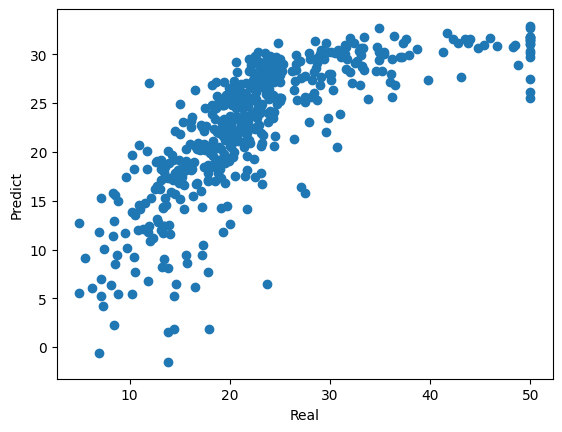

In [26]:
#독립변수 뿐 아니라 상황에 따라서는 종속변수도 변형할 수 있음
#실제주택가격과 예측값의 비교
plt.scatter(boston.target, y_hat1)
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()
#선형적으로 설명하기 어려운 모형

In [27]:
#종속변수를 제곱근 처리
model11 = sm.OLS.from_formula("np.sqrt(MEDV) ~ LSTAT",
data=df_boston)
result11 = model11.fit()
result11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.sqrt(MEDV)   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     789.7
Date:                Fri, 18 Aug 2023   Prob (F-statistic):          3.09e-105
Time:                        10:31:09   Log-Likelihood:                -445.65
No. Observations:                 506   AIC:                             895.3
Df Residuals:                     504   BIC:                             903.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9499      0.053    112.374      0.000       5.846       6.054
LSTAT         -0.1024      0.004    -28.101      0.000      -0.110      -0.095
==============================================================================
Omnibus:                       74.833   Durbin-Watson:                   0.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.528
Skew:                           0.976   Prob(JB):                     6.05e-25
Kurtosis:                       4.216   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

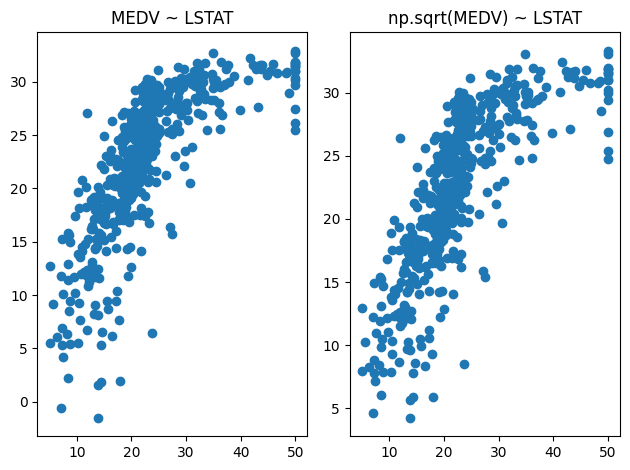

In [28]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title("MEDV ~ LSTAT")
plt.subplot(122)
plt.scatter(boston.target, (result11.predict(df_boston))**2)
plt.title("np.sqrt(MEDV) ~ LSTAT")
plt.tight_layout()
plt.show()

In [29]:
#로그를 취한 모형
model12 = sm.OLS.from_formula("np.log(MEDV) ~ LSTAT",data=df_boston)
result12 = model12.fit()
print(result12.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     928.1
Date:                Fri, 18 Aug 2023   Prob (F-statistic):          2.23e-116
Time:                        10:31:15   Log-Likelihood:               -0.57634
No. Observations:                 506   AIC:                             5.153
Df Residuals:                     504   BIC:                             13.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6176      0.022    164.654      0.0

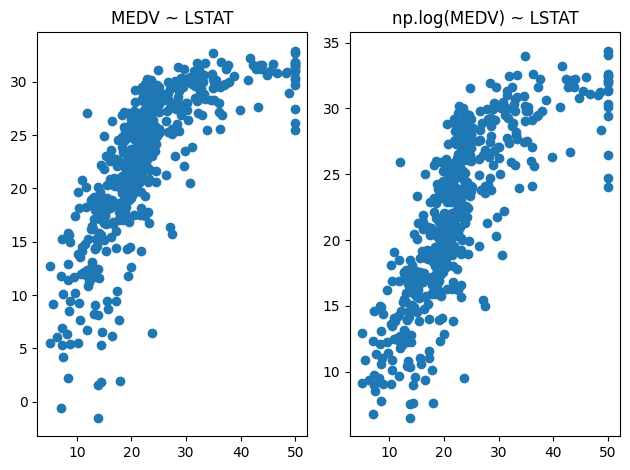

In [30]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title("MEDV ~ LSTAT")
plt.subplot(122)
plt.scatter(boston.target, np.exp(result12.predict(df_boston)))
plt.title("np.log(MEDV) ~ LSTAT")
plt.tight_layout()
plt.show()

In [31]:
#독립변수와 종속변수 모두 로그를 취한 모형(가장 성능이 좋은 모형)
model13=sm.OLS.from_formula("np.log(MEDV) ~ np.log(LSTAT)",
data=df_boston)
result13 = model13.fit()
print(result13.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1058.
Date:                Fri, 18 Aug 2023   Prob (F-statistic):          7.32e-126
Time:                        10:31:18   Log-Likelihood:                 21.325
No. Observations:                 506   AIC:                            -38.65
Df Residuals:                     504   BIC:                            -30.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.3618      0.042    103.603

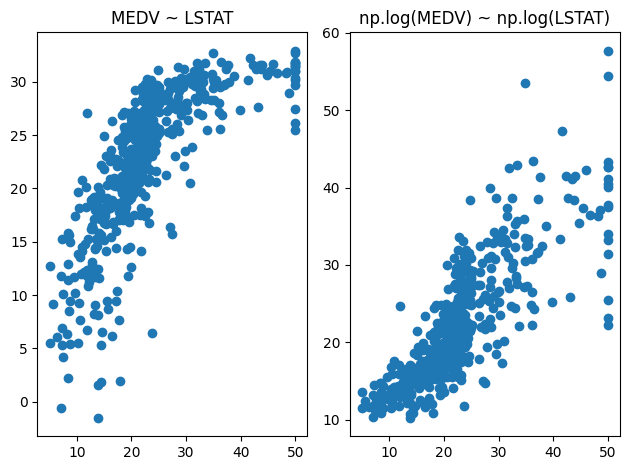

In [32]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title("MEDV ~ LSTAT")
plt.subplot(122)
plt.scatter(boston.target, np.exp(result13.predict(df_boston)))
plt.title("np.log(MEDV) ~ np.log(LSTAT)")
plt.tight_layout()
plt.show()